[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week6_Linear_regression_coding_challenge_2.ipynb)

In this challenge we'll be doing a linear fit with two input variables and one output, so our model looks like y ~ a + b*x_1 + c*x_2. First, let's import the libraries we'll need.

In [0]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [3]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/bivariate_linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,x1,x2,y
0,11.429126,-30.912912,204.163058
1,11.730814,-28.844725,202.434680
2,7.800468,7.539354,78.587293
3,4.812186,-53.531169,165.026665
4,12.688828,-9.040101,176.892635


We're going to find the optimal [a,b, c] values the right by, using the *normal equations*. The first step is to add a new column to the left of the x1 column and set all of its values to 1. Think of this as the x0 columns. Then introduce a matrix X consisting of the x0, x1, x2 columns and and vector Y with just the y column. Do any reshaping you need to make later steps work.

In [4]:
# replace with student code
data.insert(0, 'x0', 1)
data.head()

,x0,x1,x2,y
0,1,11.429126,-30.912912,204.163058
1,1,11.730814,-28.844725,202.434680
2,1,7.800468,7.539354,78.587293
3,1,4.812186,-53.531169,165.026665
4,1,12.688828,-9.040101,176.892635


In [0]:
X = data.as_matrix(columns=data.columns[0:3].tolist())
Y = np.array(data['y'])

To make sure this worked, verify that X has length 200 and width 3.

In [6]:
print (X.shape)

(200, 3)


And just for sanity' sake, print out the first row of X and compare it with the contents of the csv file we read from.

In [7]:
print (X[0])

[  1.          11.42912648 -30.9129123 ]


Now here's the most important part. As it turns out, the optimal vector [a, b, c] can be calculated in a single step (assuming you have a matrix algebra library and don't have to do the operations yourself) in terms of X and Y. Here's the solution:

(X^T * X)^(-1) * X^T * Y

where \* means *matrix multiplication*, ^T means *matrix transpose* and ^(-1) means *matrix inverse*. Calculate [a, b, c] and print the values of a, b, and c.

In [8]:
# replace with student code
result = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
print (result)

[-9.63746039 13.04187886 -2.00299621]


In [0]:
a = (result[0]+result[1]*data['x1']+result[2]*data['x2'])
#print (a)

Finally, plot the points defined by x,y and the line that you calculated using the above matrix transforms.

[Text(0.5,0,'y'), Text(0.5,0,'x2'), Text(0.5,0,'x1')]

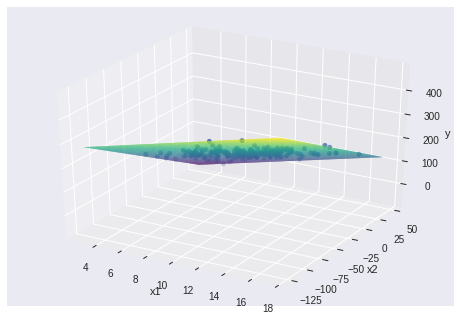

In [10]:
fig  =  plt.figure()
ax  =  plt.axes(projection ='3d')
ax.scatter(data['x1'], data['x2'], data['y'])
x1,x2 = np.meshgrid(np.linspace(data['x1'].min(),data['x1'].max()), np.linspace(data['x2'].min(),data['x2'].max()))
z = (result[0] + result[1]*x1 + result[2]*x2)
ax.plot_surface(x1, x2, z,cmap='viridis', edgecolor=None)
ax.set(xlabel='x1', ylabel='x2', zlabel='y')

Interactive plot:

In [13]:
import IPython
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()
init_notebook_mode(connected=False)
x1 = data['x1']
y1 = data['x2']
z1 = data['y']

trace1 = go.Scatter3d(x = x1, y = y1, z = z1, mode='markers', marker = dict(color = 'blue', size = 3, opacity = 0.9))

x2, y2 = np.meshgrid(x1, y1)
z2 = result[0] + result[1]*x2 + result[2]*y2

trace2 = go.Surface(x = x2, y = y2, z = z2)

fig = go.Figure(data=[trace1, trace2])
iplot(fig)